In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab


In [2]:
from numpy import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.decomposition import PCA
from sklearn import svm

In [3]:
data = pd.read_csv('/content/hw5_treasury yield curve data.csv', index_col = "Date")
data.index = pd.to_datetime(data.index)

In [4]:
data.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-17,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
2019-05-16,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2019-05-15,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
2019-05-14,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
2019-05-13,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


#EDA

In [5]:
#Shape
print("The number of Columns : ", data.shape[1])
print("The number of Rows : ", data.shape[0])

The number of Columns :  31
The number of Rows :  8071


##Scatter Plot Metrics

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


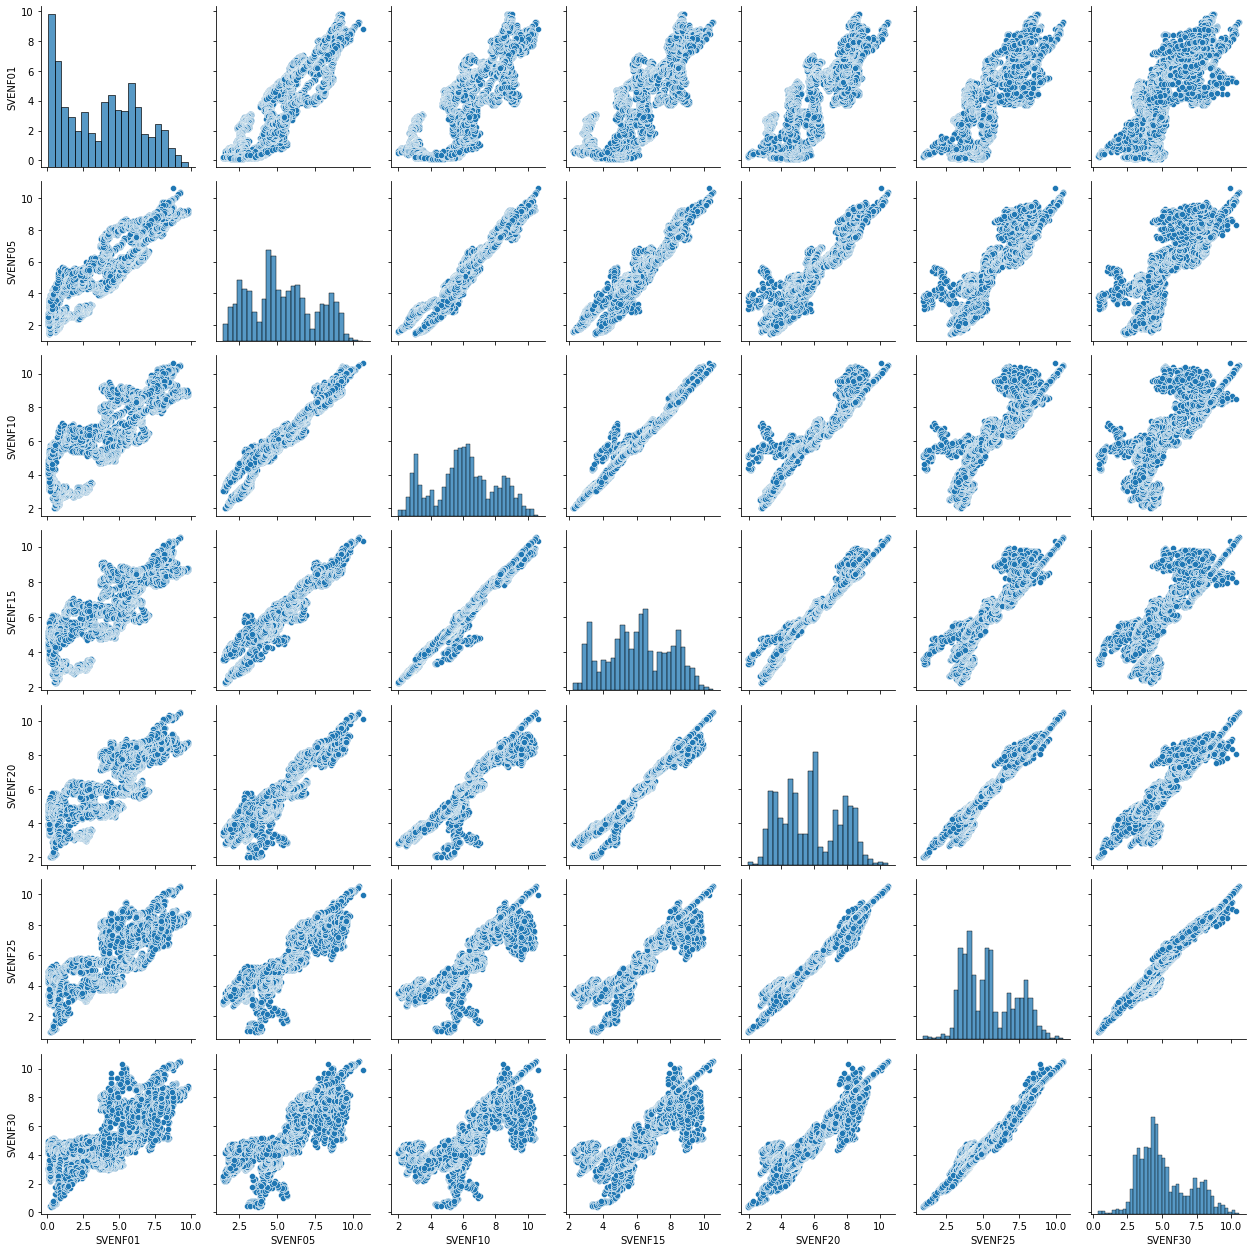

In [6]:
cols = ['SVENF01','SVENF05','SVENF10','SVENF15','SVENF20','SVENF25','SVENF30']
sns.pairplot(data[cols], size =2.5)
plt.tight_layout()
plt.show()

We observe SVENFi and SVENFi+1 /SVENFi-1 show high correlation.

In [7]:
n = []
s = []
o = []

for label in data.columns:
  N = 0  
  S = 0 
  O = 0

  for i in data[label]:
    if type(i) == str:
      S += 1
    elif(type(i) == int) or (type(i)== float):
      N += 1
    else:
      O += 1
  n.append(N)
  s.append(S)
  o.append(O)

Output={
    "Columns" : data.columns,
    "Number" : n,
    "String" : s,
    "Other" : o
}

Output = pd.DataFrame(Output)
Output


,Columns,Number,String,Other
0,SVENF01,8071,0,0
1,SVENF02,8071,0,0
2,SVENF03,8071,0,0
3,SVENF04,8071,0,0
4,SVENF05,8071,0,0
5,SVENF06,8071,0,0
6,SVENF07,8071,0,0
7,SVENF08,8071,0,0
8,SVENF09,8071,0,0
9,SVENF10,8071,0,0


All columns have integer or float entry

##QQ Plot

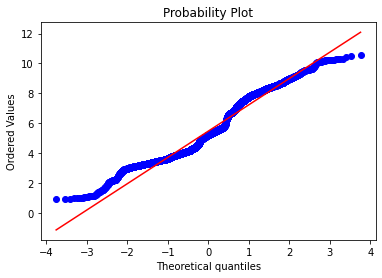

In [8]:
 stats.probplot(data['SVENF25'], dist="norm", plot=pylab)
 pylab.show()

The plot suggests somewhat normal distribution with slightly heavy tails

In [9]:
data.corr()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
SVENF01,1.000000,0.986417,0.958364,0.924637,0.890691,0.860385,0.835864,0.817792,0.805833,0.799116,...,0.818245,0.813380,0.806650,0.798100,0.787826,0.775963,0.762679,0.748167,0.732632,-0.849562
SVENF02,0.986417,1.000000,0.991325,0.971026,0.945906,0.920994,0.899469,0.882818,0.871309,0.864483,...,0.880253,0.875325,0.868506,0.859830,0.849384,0.837300,0.823744,0.808910,0.793006,-0.884194
SVENF03,0.958364,0.991325,1.000000,0.993681,0.978891,0.960996,0.943810,0.929497,0.918916,0.912072,...,0.917414,0.912155,0.905080,0.896211,0.885620,0.873430,0.859797,0.844907,0.828962,-0.898952
SVENF04,0.924637,0.971026,0.993681,1.000000,0.995480,0.985206,0.973186,0.962005,0.952978,0.946523,...,0.935990,0.929804,0.921925,0.912369,0.901202,0.888536,0.874519,0.859327,0.843153,-0.903707
SVENF05,0.890691,0.945906,0.978891,0.995480,1.000000,0.996934,0.990180,0.982494,0.975478,0.969858,...,0.941744,0.934145,0.924980,0.914267,0.902072,0.888503,0.873704,0.857846,0.841114,-0.903779
SVENF06,0.860385,0.920994,0.960996,0.985206,0.996934,1.000000,0.998022,0.993749,0.988922,0.984458,...,0.940299,0.931069,0.920375,0.908243,0.894745,0.879994,0.864134,0.847334,0.829776,-0.902343
SVENF07,0.835864,0.899469,0.943810,0.973186,0.990180,0.998022,1.000000,0.998756,0.996054,0.992905,...,0.936188,0.925358,0.913126,0.899534,0.884664,0.868636,0.851601,0.833730,0.815205,-0.901242
SVENF08,0.817792,0.882818,0.929497,0.962005,0.982494,0.993749,0.998756,1.000000,0.999202,0.997388,...,0.932400,0.920175,0.906572,0.891646,0.875496,0.858251,0.840071,0.821133,0.801622,-0.901317
SVENF09,0.805833,0.871309,0.918916,0.952978,0.975478,0.988922,0.996054,0.999202,1.000000,0.999443,...,0.930524,0.917211,0.902507,0.886484,0.869255,0.850962,0.831773,0.811874,0.791457,-0.902706
SVENF10,0.799116,0.864483,0.912072,0.946523,0.969858,0.984458,0.992905,0.997388,0.999443,1.000000,...,0.931140,0.917093,0.901615,0.884793,0.866751,0.847646,0.827655,0.806972,0.785796,-0.905134


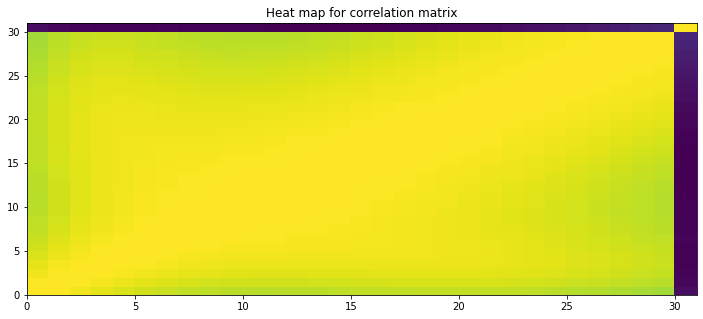

In [10]:
#Heatmap
corMat = pd.DataFrame(data.corr())
plt.figure(figsize=[12,5])
plt.title("Heat map for correlation matrix")
plt.pcolor(corMat)
plt.show()

We can see that the features are highly correlated

#PCA

In [13]:
X = data.drop('Adj_Close', axis = 1)
pca_1 = PCA(n_components =len(X.columns))
pca_1.fit_transform(X)
print("Explained Variance Ratio of all components ",pca_1.explained_variance_ratio_)
print("Cumulative Variance Ratio of all components",pca_1.explained_variance_ratio_.cumsum())



Explained Variance Ratio of all component  [9.25027254e-01 3.77198563e-02 3.11962115e-02 5.11829721e-03
 8.45006479e-04 8.14071111e-05 1.06386900e-05 1.23073879e-06
 8.99497477e-08 7.14094977e-09 4.89071592e-10 3.83422436e-11
 8.63162713e-12 7.54060102e-12 7.44722038e-12 7.41409677e-12
 7.37633844e-12 7.36922042e-12 7.21033060e-12 7.16011018e-12
 7.08499808e-12 7.01615861e-12 6.97953948e-12 6.83297854e-12
 6.78790385e-12 6.76011093e-12 6.68796631e-12 6.63106214e-12
 6.57322725e-12 6.42225375e-12]
Cumulative Variance Ratio of all component [0.92502725 0.96274711 0.99394332 0.99906162 0.99990663 0.99998803
 0.99999867 0.9999999  0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


We observe most of the variance is explained by first three components

In [14]:
pca_2 = PCA(n_components=3)
pca_2.fit_transform(X)
print("Explained Variance Ratio of 3 components ",pca_2.explained_variance_ratio_)
print("Cumulative Variance Ratio of 3 components",pca_2.explained_variance_ratio_.cumsum())

Explained Variance Ratio of 3 components  [0.92502725 0.03771986 0.03119621]
Cumulative Variance Ratio of 3 components [0.92502725 0.96274711 0.99394332]


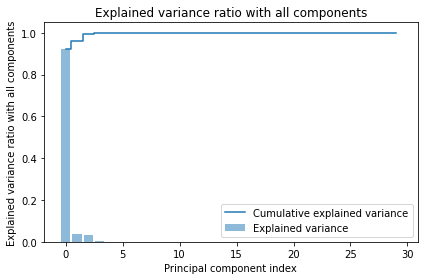

In [15]:
plt.bar(range(0,len(pca_1.explained_variance_ratio_)), pca_1.explained_variance_ratio_, alpha=0.5, align='center', label='Explained variance')
plt.step(range(0,len(pca_1.explained_variance_ratio_.cumsum())), pca_1.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with all components')
plt.ylabel('Explained variance ratio with all components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

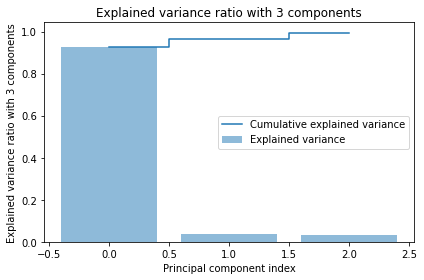

In [17]:
plt.bar(range(0,len(pca_2.explained_variance_ratio_)), pca_2.explained_variance_ratio_, alpha=0.5, align='center', label='Explained variance')
plt.step(range(0,len(pca_2.explained_variance_ratio_.cumsum())), pca_2.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with 3 components')
plt.ylabel('Explained variance ratio with 3 components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#Linear Regression VS SVM.

##All Features

In [32]:
X= data.drop('Adj_Close', axis = 1).values
y = data['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

mse_1 = MSE(y_pred_train, y_train)
r2_1 = R2(y_pred_train, y_train)
mse_2 = MSE(y_pred, y_test)
r2_2 = R2(y_pred, y_test)

print("R2 for training set: ", r2_1)
print("RMSE for training set: ", sqrt(mse_1))
print("R2 for test set: ", r2_2)
print("RMSE for test set: ", sqrt(mse_2))




R2 for training set:  0.8916880358469987
RMSE for training set:  0.7766533040369964
R2 for test set:  0.8922659110988516
RMSE for test set:  0.7823695855060314


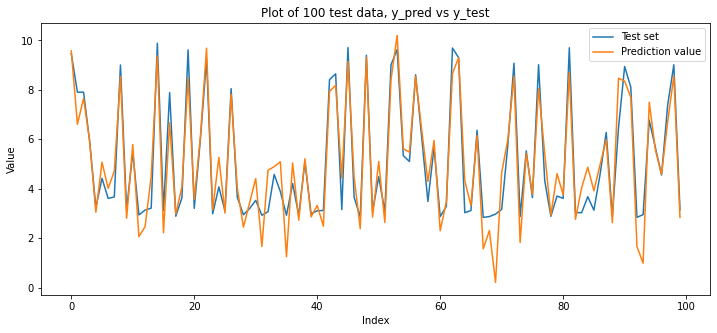

In [21]:
plt.figure(figsize = [12,5])
plt.plot(y_test[:100], label = 'Test set')
plt.plot(y_pred[:100], label = 'Prediction value')
plt.legend()
plt.title('Plot of 100 test data, y_pred vs y_test')
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

Residual Plot

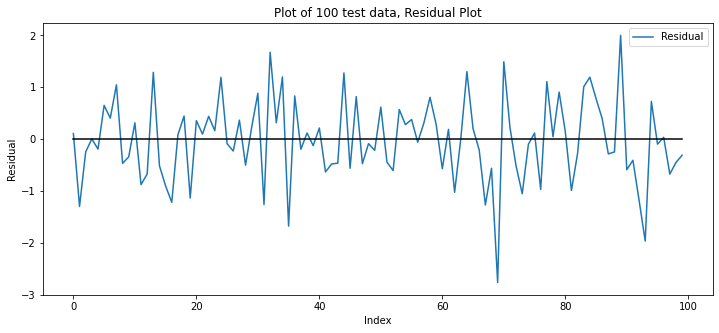

In [23]:
import numpy as np

plt.figure(figsize = [12,5])
plt.plot(y_pred[:100] - y_test[:100] , label = 'Residual')
plt.plot(np.zeros_like(y_pred[:100]), c='black')
plt.legend()
plt.title('Plot of 100 test data, Residual Plot')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

#Linear Regression with PCA

R2 for training set:  0.8471141364163035
RMSE for training set:  0.9047123056164791
R2 for test set:  0.8444825521100208
RMSE for test set:  0.9236577822901371


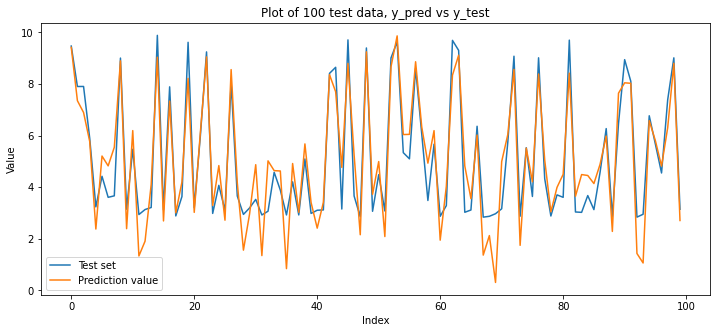

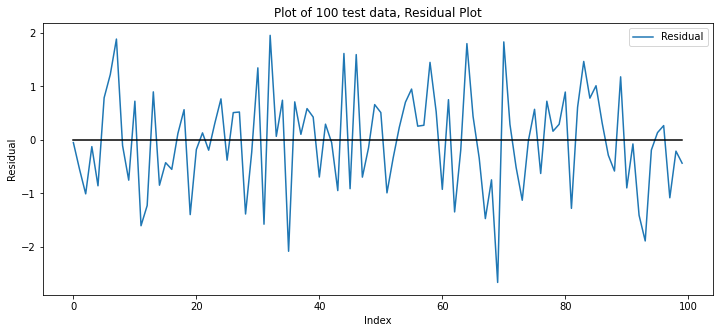

In [33]:
X= data.drop('Adj_Close', axis = 1).values
y = data['Adj_Close'].values

pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

mse_1 = MSE(y_pred_train, y_train)
r2_1 = R2(y_pred_train, y_train)
mse_2 = MSE(y_pred, y_test)
r2_2 = R2(y_pred, y_test)

print("R2 for training set: ", r2_1)
print("RMSE for training set: ", sqrt(mse_1))
print("R2 for test set: ", r2_2)
print("RMSE for test set: ", sqrt(mse_2))

plt.figure(figsize = [12,5])
plt.plot(y_test[:100], label = 'Test set')
plt.plot(y_pred[:100], label = 'Prediction value')
plt.legend()
plt.title('Plot of 100 test data, y_pred vs y_test')
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize = [12,5])
plt.plot(y_pred[:100] - y_test[:100] , label = 'Residual')
plt.plot(np.zeros_like(y_pred[:100]), c='black')
plt.legend()
plt.title('Plot of 100 test data, Residual Plot')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

#SVM with all Features

R2 for training set:  0.8897341793210249
RMSE for training set:  0.8114294001125022
R2 for test set:  0.8899970583130095
RMSE for test set:  0.8209515946893111


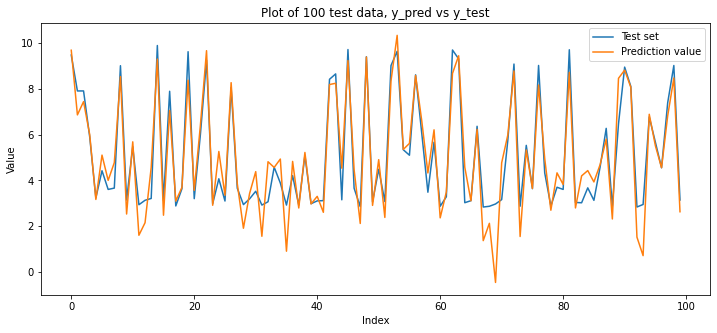

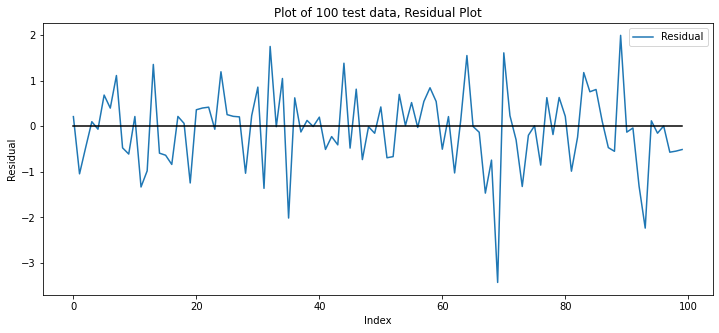

In [34]:
X= data.drop('Adj_Close', axis = 1).values
y = data['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =42)

clf = svm.SVR(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

mse_1 = MSE(y_pred_train, y_train)
r2_1 = R2(y_pred_train, y_train)
mse_2 = MSE(y_pred, y_test)
r2_2 = R2(y_pred, y_test)

print("R2 for training set: ", r2_1)
print("RMSE for training set: ", sqrt(mse_1))
print("R2 for test set: ", r2_2)
print("RMSE for test set: ", sqrt(mse_2))

plt.figure(figsize = [12,5])
plt.plot(y_test[:100], label = 'Test set')
plt.plot(y_pred[:100], label = 'Prediction value')
plt.legend()
plt.title('Plot of 100 test data, y_pred vs y_test')
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize = [12,5])
plt.plot(y_pred[:100] - y_test[:100] , label = 'Residual')
plt.plot(np.zeros_like(y_pred[:100]), c='black')
plt.legend()
plt.title('Plot of 100 test data, Residual Plot')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

##SVM with PCA

R2 for training set:  0.8586900167544976
RMSE for training set:  0.921312844430393
R2 for test set:  0.8564245104810773
RMSE for test set:  0.9413759239885617


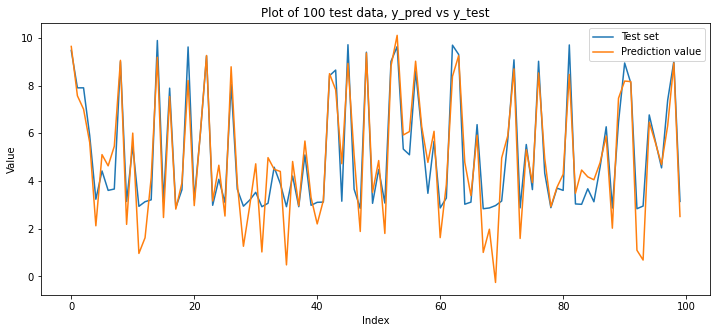

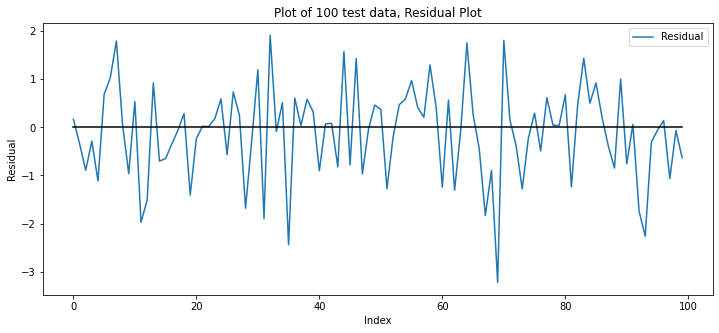

In [36]:
X= data.drop('Adj_Close', axis = 1).values
y = data['Adj_Close'].values

pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =42)

clf = svm.SVR(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

mse_1 = MSE(y_pred_train, y_train)
r2_1 = R2(y_pred_train, y_train)
mse_2 = MSE(y_pred, y_test)
r2_2 = R2(y_pred, y_test)

print("R2 for training set: ", r2_1)
print("RMSE for training set: ", sqrt(mse_1))
print("R2 for test set: ", r2_2)
print("RMSE for test set: ", sqrt(mse_2))

plt.figure(figsize = [12,5])
plt.plot(y_test[:100], label = 'Test set')
plt.plot(y_pred[:100], label = 'Prediction value')
plt.legend()
plt.title('Plot of 100 test data, y_pred vs y_test')
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize = [12,5])
plt.plot(y_pred[:100] - y_test[:100] , label = 'Residual')
plt.plot(np.zeros_like(y_pred[:100]), c='black')
plt.legend()
plt.title('Plot of 100 test data, Residual Plot')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

#Signing

In [29]:
print("My name is Ananya Singh")
print("My NetID is: as133")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Ananya Singh
My NetID is: as133
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
